In [1]:
# Try Best xgb + extra tree algos
from extract_helpers_shifted import *
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, \
    GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from scoring_functions import *


pooled_set = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$",
        "$\mathcal{DelocIndBond}_{5}$",
        "$\mathcal{DelSqRho}_{1}$",
        "$\mathcal{DelSqV}_{7}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{5}$",
        "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPe}_{10}$",
        "$\mathcal{ESPn}_{4}$", "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c,7}$",
        "$\mathcal{K|Scaled|}_{basic,1}$", "$\mathcal{K|Scaled|}_{basic,2}$",
        "$\mathcal{K|Scaled|}_{basic,3}$", "$\mathcal{K|Scaled|}_{basic,4}$",
        "$\mathcal{K|Scaled|}_{basic,6}$",
        "$\mathcal{Kinetic}_{basic,5}$",
        "$\mathcal{Lagr}_{basic,1}$", "$\mathcal{Lagr}_{basic,5}$", "$\mathcal{Lagrangian}_{2}$",
        "$\mathcal{Stress_EigVals}_{c,7}$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$",
        "$\mathcal{Vnuc}_{4}$", "$\mathcal{Vnuc}_{5}$", "$\mathcal{Vnuc}_{6}$"
    ]

pool_uncorr = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$",
        "$\mathcal{DelocIndBond}_{5}$",
        "$\mathcal{DelSqRho}_{1}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{4}$", "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c,7}$",
        "$\mathcal{K|Scaled|}_{basic,1}$", "$\mathcal{K|Scaled|}_{basic,2}$",
        "$\mathcal{K|Scaled|}_{basic,3}$", "$\mathcal{K|Scaled|}_{basic,4}$",
        "$\mathcal{Kinetic}_{basic,5}$", "$\mathcal{Kinetic}_{basic,6}$",
        "$\mathcal{Lagr}_{basic,1}$", "$\mathcal{Lagr}_{basic,5}$", "$\mathcal{Lagrangian}_{2}$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$",
        "$\mathcal{Vnuc}_{4}$", "$\mathcal{Vnuc}_{5}$", "$\mathcal{Vnuc}_{6}$"
    ]

# physical set, general model
physical = \
    [
        "$\mathcal{Bond}_{7}$", "$\mathcal{Bond}_{8}$", "$\mathcal{Bond}_{9}$", "$\mathcal{Bond}_{10}$",
        "$\mathcal{DelocIndBond}_{5}$",
        "$\mathcal{ESP}_{1}$", "$\mathcal{ESP}_{2}$", "$\mathcal{ESP}_{3}$", "$\mathcal{ESP}_{4}$",
        "$\mathcal{ESP}_{5}$", "$\mathcal{ESP}_{6}$",
        "$\mathcal{ESPn}_{4}$", "$\mathcal{ESPn}_{5}$",
        "$\mathcal{HessRhoEigVals}_{c,7}$",
        "$\mathcal{K|Scaled|}_{basic,1}$", "$\mathcal{K|Scaled|}_{basic,2}$", "$\mathcal{K|Scaled|}_{basic,3}$",
        "$\mathcal{K|Scaled|}_{basic,4}$", "$\mathcal{K|Scaled|}_{basic,5}$", "$\mathcal{K|Scaled|}_{basic,6}$",
        "$\mathcal{Vnuc}_{1}$", "$\mathcal{Vnuc}_{2}$", "$\mathcal{Vnuc}_{3}$", "$\mathcal{Vnuc}_{4}$",
        "$\mathcal{Vnuc}_{5}$",
        "$\mathcal{Vnuc}_{6}$"
    ]


x, y = extract_all()
x_val = extract_test()



min = np.min(y)
max = np.max(y)
# y_scale = (y - min) / (max - min)
std = (np.std(y), np.mean(y))
# std = max - min
y_scale = (y - np.mean(y)) / np.std(y)


phys_x_df = x[physical]
phys_x_df_val = x_val[physical]

pool_x_uncorr_df = x[pool_uncorr]
pool_x_uncorr_df_val = x_val[pool_uncorr]

pool_x_df = x[pooled_set]
pool_x_df_val = x_val[pooled_set]

scaler = StandardScaler().fit(x)
full_input = scaler.transform(x)
full_input_val = scaler.transform(x_val)

scaler = StandardScaler().fit(x[pooled_set].to_numpy())
pool_x = scaler.transform(x[pooled_set].to_numpy())
pool_x_val = scaler.transform(x_val[pooled_set].to_numpy())

scaler = StandardScaler().fit(x[physical].to_numpy())
phys_x = scaler.transform(x[physical].to_numpy())
phys_x_val = scaler.transform(x_val[physical].to_numpy())

scaler = StandardScaler().fit(x[pool_uncorr].to_numpy())
pool_x_uncorr = scaler.transform(x[pool_uncorr].to_numpy())   
pool_x_uncorr_val  = scaler.transform(x_val[pool_uncorr].to_numpy())




# selection of what feature set to use
physical_set = True
pool = False 
all = False 

if (pool == True):
    dataset = pool_x
    ref_df = pool_x_df
    dataset_val = pool_x_val
    ref_df_val = pool_x_df_val
else:
    if (physical_set == True):
        dataset = phys_x
        ref_df = phys_x_df
        dataset_val = phys_x_val
        ref_df_val = phys_x_df_val
    else:
        if (all == True):
            dataset = full_input
            ref_df = x
            dataset_val = full_input_val
            ref_df_val = x_val
            
        else:
            dataset = pool_x_uncorr
            ref_df = pool_x_uncorr_df
            dataset_val = pool_x_uncorr_val
            ref_df_val = pool_x_uncorr_df_val
            
x_train, x_test, y_train, y_test = train_test_split(ref_df, y_scale, test_size=0.2, random_state=1)

print("data split and scaled")






../enzy_test/ce11-opt.sum
../enzy_test/ce20-opt.sum
../enzy_test/exo_syn_left_+16-opt.sum
../enzy_test/exo_syn_left_-16-opt.sum
../enzy_test/exo_syn_right_+16-opt.sum
../enzy_test/exo_syn_right_-16-opt.sum
../enzy_test/exo_syn_left_nef-opt.sum
../enzy_test/exo_syn_right_nef-opt.sum
data split and scaled


xgb algorithms
................................................
----------------------------------------------------
MAE test score: 	15.206671573009503
MAE train score:	3.4822263017341095
----------------------------------------------------
r2 score test: 		0.6970054431758697
r2 score train:		0.9904604374803851


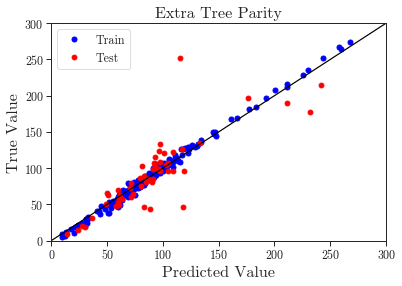

----------------------------------------------------
worst residuals: 1.1590306929605936, 1.548527238221268, 2.942616734130331
worst index: 7, 18, 35
1st worst barrier prediction: 177.9198955
2st worst barrier prediction: 45.8333535
3st worst barrier prediction: 251.7728476
1st worst resid: -53.830996887165384
2st worst resid: -71.9211022164139
3st worst resid: 136.66936796166127
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	218.40138053114475
MAE test score: 	11.116077999750164
r2 score test: 		0.8715899481624678
----------------------------------------------------
(46.444841550883424, 87.85107327093863)


/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


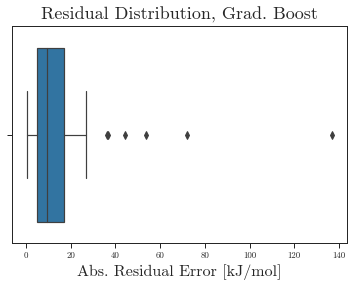

In [14]:
print("xgb algorithms")
reg_xgb = xgb.XGBRegressor(
    reg_alpha=0.2, colsample_bytree=0.4, eta=0.0, gamma=0.0,
    reg_lambda=0.0, learning_rate=0.01, max_depth=5, n_estimators=500,
    objective="reg:squarederror", tree_method="gpu_hist")

reg_xgb.fit(x_train, y_train)
score_single(reg_xgb, x_train, x_test, y_train, y_test, std)


extra algorithm
................................................
----------------------------------------------------
MAE test score: 	12.129177262897288
MAE train score:	4.116851336064065
----------------------------------------------------
r2 score test: 		0.756781753700514
r2 score train:		0.9726030046938414


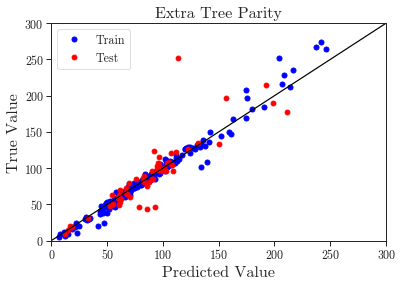

----------------------------------------------------
worst residuals: 0.8922710345115834, 1.0092941516040481, 2.968550367081491
worst index: 16, 18, 35
1st worst barrier prediction: 44.1716746
2st worst barrier prediction: 45.8333535
3st worst barrier prediction: 251.7728476
1st worst resid: -41.44138681833333
2st worst resid: -46.87650694948333
3st worst resid: 137.87385143491667
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	147.91358946536678
MAE test score: 	8.54796568904745
r2 score test: 		0.918570219595007
----------------------------------------------------
(46.444841550883424, 87.85107327093863)


/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


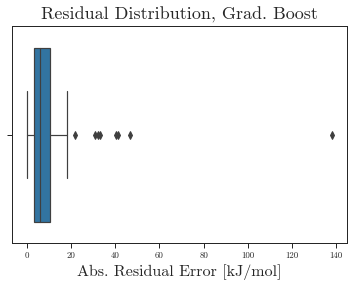

In [15]:
print("extra algorithm")
reg_extra = ExtraTreesRegressor(min_samples_split=2,
                                min_samples_leaf=2,
                                n_estimators=1600)

reg_extra = ExtraTreesRegressor(min_samples_split=2,
                                min_samples_leaf=2,
                                n_estimators=500)
custom_scorer_extra = custom_skopt_extra_scorer
reg_extra.fit(x_train, y_train)
score_single(reg_extra, x_train, x_test, y_train, y_test, std)


random forest algorithms 
................................................
----------------------------------------------------
MAE test score: 	15.807338789303568
MAE train score:	6.729965408753394
----------------------------------------------------
r2 score test: 		0.6401211596317364
r2 score train:		0.9431688333006157


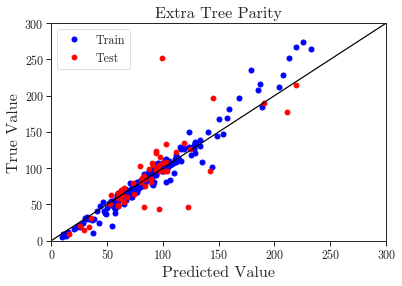

----------------------------------------------------
worst residuals: 1.1241466857799387, 1.6572637784687612, 3.275919829994683
worst index: 16, 18, 35
1st worst barrier prediction: 44.1716746
2st worst barrier prediction: 45.8333535
3st worst barrier prediction: 251.7728476
1st worst resid: -52.21081470099999
2st worst resid: -76.97135359899998
3st worst resid: 152.1495774375
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	258.85199536127914
MAE test score: 	11.393947669122642
r2 score test: 		0.8574961150233015
----------------------------------------------------
(46.444841550883424, 87.85107327093863)


/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


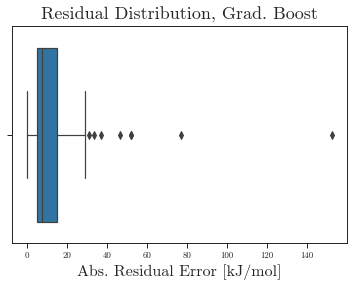

In [16]:
print("random forest algorithms ")
reg_rf = RandomForestRegressor(min_samples_leaf=2, min_samples_split=2,
                               n_estimators=100, n_jobs=10)
reg_rf = RandomForestRegressor(n_jobs=10)
custom_scorer_rf = custom_skopt_rf_scorer
reg_rf.fit(x_train, y_train)
score_single(reg_rf, x_train, x_test, y_train, y_test, std)

................................................
----------------------------------------------------
MAE test score: 	15.289425819387134
MAE train score:	1.6924406542330288
----------------------------------------------------
r2 score test: 		0.7052406751010565
r2 score train:		0.9980650614532266


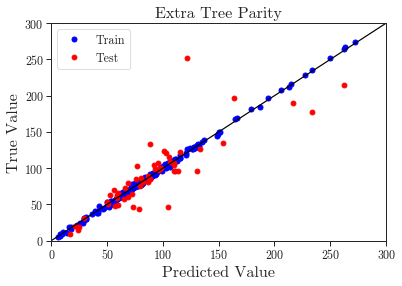

----------------------------------------------------
worst residuals: 1.202543527876667, 1.2580684044036707, 2.7998006722553335
worst index: 7, 18, 35
1st worst barrier prediction: 177.9198955
2st worst barrier prediction: 45.8333535
3st worst barrier prediction: 251.7728476
1st worst resid: -55.85194361027216
2st worst resid: -58.43078770270122
3st worst resid: 130.03629859695585
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	261.12344937295217
MAE test score: 	11.545071999542458
r2 score test: 		0.8464713150048558
----------------------------------------------------
(46.444841550883424, 87.85107327093863)


/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


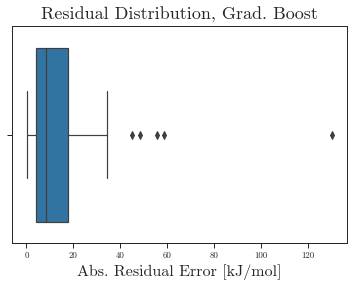

In [17]:
dict = {'learning_rate': 0.005, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8,
        'n_estimators': 1500, 'subsample': 0.5}

dict = {'learning_rate': 0.020037429107630705, 'min_samples_split': 3, 'min_samples_leaf': 1, 
        'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.3319757440943847}
reg_grad = GradientBoostingRegressor(**dict)
reg_grad.fit(x_train, y_train)
score_single(reg_grad, x_train, x_test, y_train, y_test, std)

ada algorithm
................................................
----------------------------------------------------
MAE test score: 	18.66707637466795
MAE train score:	14.334688584340293
----------------------------------------------------
r2 score test: 		0.6416915681709126
r2 score train:		0.8629680166356539


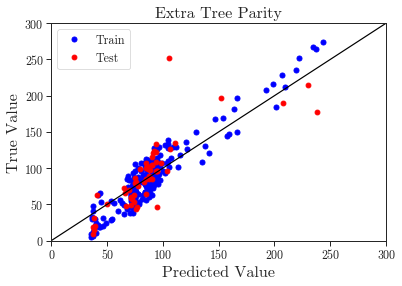

----------------------------------------------------
worst residuals: 1.0523526974021253, 1.2904214721152385, 3.156982744201964
worst index: 18, 7, 35
1st worst barrier prediction: 45.8333535
2st worst barrier prediction: 177.9198955
3st worst barrier prediction: 251.7728476
1st worst resid: -48.87635428648648
2st worst resid: -59.933420806249984
3st worst resid: 146.62556333333333
(46.444841550883424, 87.85107327093863)
----------------------------------------------------
MSE test score: 	336.6152174112679
MAE test score: 	14.90416865198746
r2 score test: 		0.802085596668517
----------------------------------------------------
(46.444841550883424, 87.85107327093863)


/home/santiagovargas/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


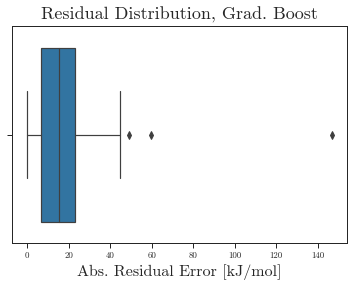

In [18]:
print("ada algorithm")
reg_ada = AdaBoostRegressor(n_estimators=1000, learning_rate=0.10)
reg_ada.fit(x_train, y_train)
score_single(reg_ada, x_train, x_test, y_train, y_test, std)

In [19]:
import gpflow
from gpflow.ci_utils import ci_niter
from tensorflow_probability import distributions as tfd
import tensorflow_probability as tfp
import tensorflow as tf

opt = gpflow.optimizers.Scipy()
#k = gpflow.kernels.RationalQuadratic()
k = gpflow.kernels.Matern52()
#k = Tanimoto()

reg_gp = gpflow.models.GPR(data=(x_train, y_train.reshape(-1, 1)), kernel=k,
                           noise_variance=1)
opt_logs = opt.minimize(reg_gp.training_loss, reg_gp.trainable_variables, options={"maxiter":10000}, )
f64 = gpflow.utilities.to_default_float

# option for two different, common kernels from cheminformatics

# matern
reg_gp.kernel.lengthscales.prior = tfd.Gamma(f64(1.0), f64(1.0))
reg_gp.kernel.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))
reg_gp.likelihood.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))

# tanimoto
# reg_gp.likelihood.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))
# reg_gp.kernel.variance.prior = tfd.Gamma(f64(1.0), f64(1.0))

num_burnin_steps = ci_niter(500)
num_samples = ci_niter(10000)

# Note that here we need model.trainable_parameters, not trainable_variables - only parameters can have priors!
hmc_helper = gpflow.optimizers.SamplingHelper(
    reg_gp.log_posterior_density, reg_gp.trainable_parameters
)

hmc = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=hmc_helper.target_log_prob_fn, num_leapfrog_steps=10, step_size=0.01
)
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    hmc, num_adaptation_steps=10, target_accept_prob=f64(0.75), adaptation_rate=0.1
)


@tf.function
def run_chain_fn():
    return tfp.mcmc.sample_chain(
        num_results=num_samples,
        num_burnin_steps=num_burnin_steps,
        current_state=hmc_helper.current_state,
        kernel=adaptive_hmc,
        trace_fn=lambda _, pkr: pkr.inner_results.is_accepted,
    )


samples, _ = run_chain_fn()
parameter_samples = hmc_helper.convert_to_constrained_values(samples)
param_to_name = {param: name for name, param in gpflow.utilities.parameter_dict(reg_gp).items()}

# gp returns mean and standard deviation of sample dist.
y_pred, y_var = reg_gp.predict_f(np.array(x_test))
y_pred_test, y_var = reg_gp.predict_f(np.array(x_test))
y_pred_train, y_var = reg_gp.predict_f(np.array(x_train))

print(reg_gp.training_loss)

print("------------------------------")
print("gaussian process algorithm")
# statistics
mse_test = str(mean_squared_error(y_test * std[0], y_pred_test * std[0]))
mse_train = str(mean_squared_error(y_train * std[0], y_pred_train * std[0]))
mae_test = str(mean_absolute_error(y_test * std[0], y_pred_test * std[0]))
mae_train = str(mean_absolute_error(y_train * std[0], y_pred_train * std[0]))
r2_test = str(r2_score(y_test, y_pred_test))
r2_train = str(r2_score(y_train, y_pred_train))

print("MSE test score: \t" + str(mse_test))
print("MAE test score: \t" + str(mae_test))
print("r2 score test: \t\t" + str(r2_test))

resid = [np.abs(y_test[i] - y_pred_test[i])[0] for i in range(len(y_test))]
sorted = np.argsort(resid)  # decreasing order
[worst1, worst2, worst3] = [i for i in sorted[len(sorted) - 3:len(sorted)]]
x_test_sans = x_test.drop([x_test.index[worst1], x_test.index[worst2], x_test.index[worst3]])
y_test_sans = np.delete(y_test, [worst1, worst2, worst3])
y_pred_test, y_var = reg_gp.predict_f(np.array(x_test_sans))
mse_test = str(mean_squared_error(y_test_sans * std[0], y_pred_test * std[0]))
mae_test = str(mean_absolute_error(y_test_sans * std[0], y_pred_test * std[0]))
r2_test = str(r2_score(y_test_sans, y_pred_test))
print("----------------------------------------------------")
print("MSE test score: \t" + str(mse_test))
print("MAE test score: \t" + str(mae_test))
print("r2 score test: \t\t" + str(r2_test))
print("----------------------------------------------------")


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


TypeError: in user code:

    <ipython-input-19-822cf9d99c1a>:46 run_chain_fn  *
        return tfp.mcmc.sample_chain(

    TypeError: 'dict' object is not callable


In [20]:
print(std)

#print(reg_xgb.predict(ref_df_val)* std[0] + std[1])
print(reg_extra.predict(ref_df_val)* std[0] + std[1])
#print(reg_rf.predict(ref_df_val)* std[0] + std[1])

#print(reg_grad.predict(ref_df_val)* std[0] + std[1])
#print(dataset_val)

(46.444841550883424, 87.85107327093863)
[90.85700818 74.26371683 80.43639763 81.11095026 82.94394312 83.69411657
 80.72899715 83.31931778]


In [ ]:
ref_df_val
# Physical 
# extra - ce11 > ce20 
#uncorr
#extra- ce11 > ce20

80.43639763 81.11095026 82.94394312 83.69411657 80.72899715 83.31931778

#../enzy_test/exo_syn_left_+16-opt.sum
#../enzy_test/exo_syn_left_-16-opt.sum
#../enzy_test/exo_syn_right_+16-opt.sum
#../enzy_test/exo_syn_right_-16-opt.sum
#../enzy_test/exo_syn_left_nef-opt.sum
#../enzy_test/exo_syn_right_nef-opt.sum

#order: left+16, left_nef, left, left-16, right+16, right_nef, right-16
#barriers(in order): 80.44, 80.73, 81.11, 82.94, 83.32, 83.69